In [1]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
import numpy as np
import pandas as pd
df = pd.read_csv("C:\\Users\\Admin\\Downloads\\salary_data (1).csv")
df

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [15]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [16]:
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

In [17]:
df.shape

(30, 2)

In [18]:
df.size

60

In [19]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [20]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

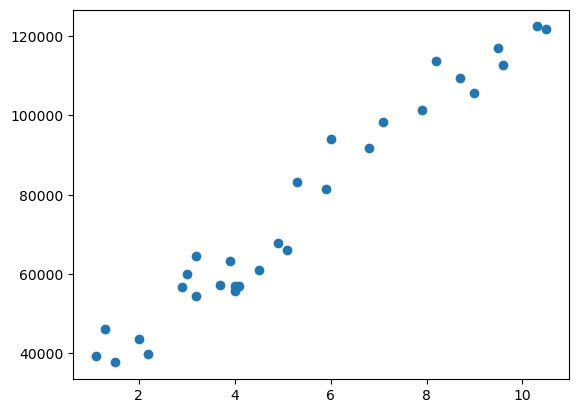

In [25]:
plt.scatter(df["YearsExperience"],df["Salary"])

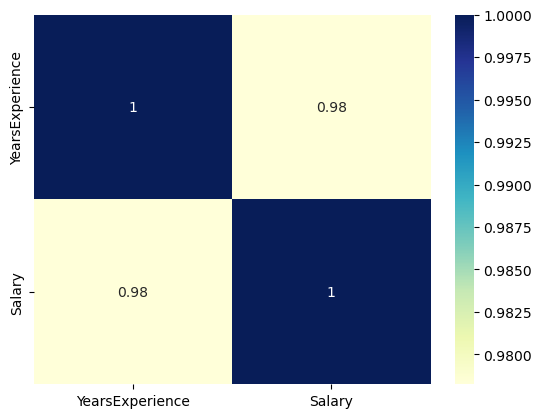

In [26]:
sns.heatmap(df.corr(),cmap = "YlGnBu" , annot = True)
plt.show()

In [27]:
x = df["Salary"]
y = df["YearsExperience"]

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [29]:
x_train

27    112635
25    105582
6      60150
17     83088
22    101302
11     55794
4      39891
29    121872
0      39343
1      46205
18     81363
14     61111
19     93940
21     98273
2      37731
20     91738
10     63218
16     66029
15     67938
23    113812
7      54445
3      43525
24    109431
8      64445
Name: Salary, dtype: int64

In [30]:
y_train.head()

27    9.6
25    9.0
6     3.0
17    5.3
22    7.9
Name: YearsExperience, dtype: float64

In [31]:
import statsmodels.api as sm

In [32]:
# Add a constant to get an intercept
x_train_sm = sm.add_constant(x_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, x_train_sm).fit()

In [33]:
lr.params

const    -2.472807
Salary    0.000102
dtype: float64

In [34]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:        YearsExperience   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     430.7
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           6.14e-16
Time:                        14:55:56   Log-Likelihood:                -21.893
No. Observations:                  24   AIC:                             47.79
Df Residuals:                      22   BIC:                             50.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4728      0.392     -6.315      0.0

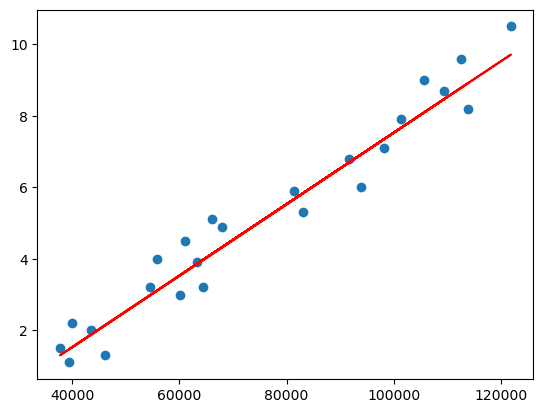

In [35]:
plt.scatter(x_train, y_train)
plt.plot(x_train, -2.4728 + 0.0001*x_train, 'r')
plt.show()

In [36]:
# Add a constant to X_test
x_test_sm = sm.add_constant(x_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(x_test_sm)

In [37]:
y_pred.head()

9     3.339510
26    9.415159
28    9.966216
13    3.328534
5     3.283916
dtype: float64

In [38]:
from sklearn.metrics import r2_score

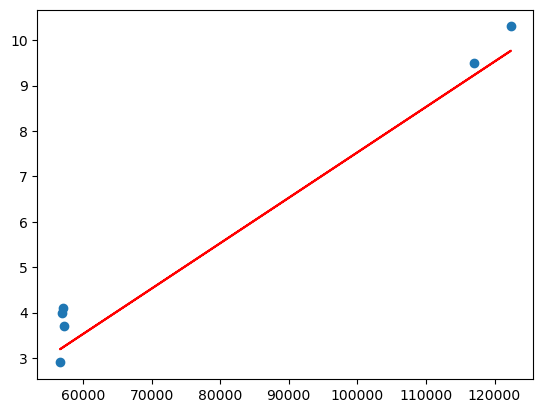

In [39]:
plt.scatter(x_test, y_test)
plt.plot(x_test, -2.4728 + 0.0001 * x_test, 'r')
plt.show()

In [40]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.9724053802235703

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(y_test,y_pred)

0.24317758677978749

In [43]:
import numpy as np
from math import sqrt

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.4931303953112072